In [1]:
from compute_pell_tables import *
from compute_xiell_tables import *
from compute_cell_tables import *
from utils import convert

from wrapper_for_marco import *

import matplotlib.pyplot as plt

In [2]:
pars = [2.75, 0.9665, 0.6921, 0.02242, 0.1192, 0.001, 4]
pars_ = convert(pars) + [4,1.]

# Pre-recon power spectra

In [3]:
kvec, p0t_z3, p2t_z3, _ = compute_pell_tables(pars_, z=0.59)

fnameM = 'data/M_BOSS_DR12_NGC_z3_V6C_1_1_1_1_1_1200_2000.matrix.gz'
fnameW = 'data/W_BOSS_DR12_NGC_z3_V6C_1_1_1_1_1_10_200_2000_averaged_v1.matrix.gz'
kdat,p0_z3,p2_z3 = compute_binned_pell_tables(pars_, fnameM, fnameW, z=0.59)

In [4]:
kvec, p0t_z1, p2t_z1, _ = compute_pell_tables(pars_, z=0.38)

fnameM = 'data/M_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_1200_2000.matrix.gz'
fnameW = 'data/W_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_2000_averaged_v1.matrix.gz'
kdat,p0_z1,p2_z1 = compute_binned_pell_tables(pars_, fnameM, fnameW, z=0.38)

(0.0, 0.2)

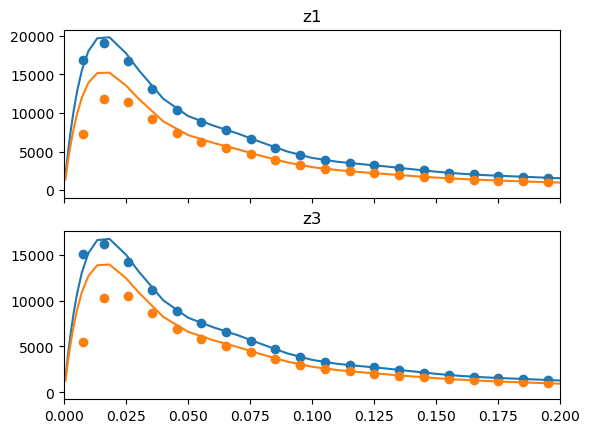

In [5]:
fig,ax = plt.subplots(2,1,sharex=True)

ax[0].set_title(r'z1')
ax[0].plot(kvec,p0t_z1[:,0])
ax[0].scatter(kdat,p0_z1[:,0])
ax[0].plot(kvec,p2t_z1[:,0])
ax[0].scatter(kdat,p2_z1[:,0])

ax[1].set_title(r'z3')
ax[1].plot(kvec,p0t_z3[:,0])
ax[1].scatter(kdat,p0_z3[:,0])
ax[1].plot(kvec,p2t_z3[:,0])
ax[1].scatter(kdat,p2_z3[:,0])

plt.xlim(0,0.2)

### Sanity check with wrapper

In [6]:
k,p0w_z1,p2w_z1 = ptable_NGC_z1(pars)
k,p0w_z3,p2w_z3 = ptable_NGC_z3(pars)

In [7]:
print(np.isclose(k,kdat).all())
print(np.isclose(p0w_z1,p0_z1[:,:12]).all())
print(np.isclose(p2w_z1,p2_z1[:,:12]).all())
print(np.isclose(p0w_z3,p0_z3[:,:12]).all())
print(np.isclose(p2w_z3,p2_z3[:,:12]).all())

True
True
True
True
True


# Post-recon correlation function

In [8]:
routs, xi0t_z3, xi2t_z3 = compute_xiell_tables(pars_, z=0.59)
rdat,xi0_z3,xi2_z3 = compute_binned_xiell_tables(pars_, z=0.59)

In [9]:
routs, xi0t_z1, xi2t_z1 = compute_xiell_tables(pars_, z=0.38)
rdat,xi0_z1,xi2_z1 = compute_binned_xiell_tables(pars_, z=0.38)

(50.0, 160.0)

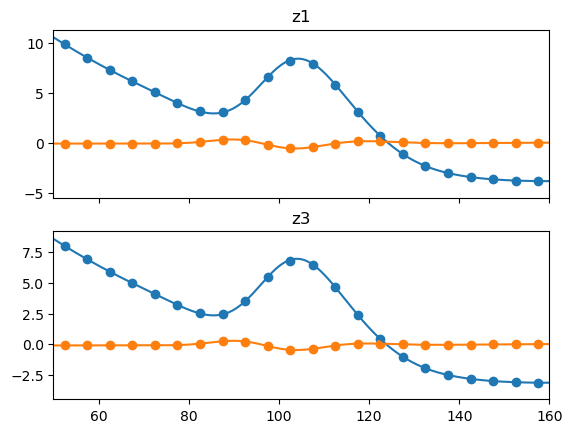

In [10]:
fig,ax = plt.subplots(2,1,sharex=True)

ax[0].set_title(r'z1')
ax[0].plot(routs,routs**2*xi0t_z1[:,0])
ax[0].scatter(rdat,rdat**2*xi0_z1[:,0])
ax[0].plot(routs,routs**2*xi2t_z1[:,0])
ax[0].scatter(rdat,rdat**2*xi2_z1[:,0])

ax[1].set_title(r'z3')
ax[1].plot(routs,routs**2*xi0t_z3[:,0])
ax[1].scatter(rdat,rdat**2*xi0_z3[:,0])
ax[1].plot(routs,routs**2*xi2t_z3[:,0])
ax[1].scatter(rdat,rdat**2*xi2_z3[:,0])

plt.xlim(50,160)

### Sanity check with wrapper

In [11]:
r, xi0w_z1, xi2w_z1 = xitable_z1(pars)
r, xi0w_z3, xi2w_z3 = xitable_z3(pars)

In [12]:
print(np.isclose(r,rdat).all())
print(np.isclose(xi0w_z1,xi0_z1[:,:6]).all())
print(np.isclose(xi2w_z1,xi2_z1[:,:6]).all())
print(np.isclose(xi0w_z3,xi0_z3[:,:6]).all())
print(np.isclose(xi2w_z3,xi2_z3[:,:6]).all())

True
True
True
True
True


# Cross-correlation with CMB lensing

In [13]:
ell, Clt_z1 = get_Clt_z1(pars_)
ell, Clt_z3 = get_Clt_z3(pars_)

In [14]:
ll, Clt_bin_z1 = get_binned_Clt_z1(pars_)
ll, Clt_bin_z3 = get_binned_Clt_z3(pars_)

Text(0, 0.5, '$10^6 C^{\\kappa g}_\\ell$')

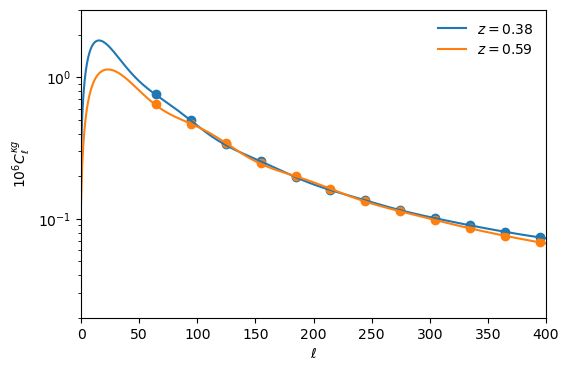

In [15]:
plt.figure(figsize=(6,4))

monomials = np.array([1,1.4,0,0,2,0.77]) # 1, b1, b2, bs, alpha_x, s_mu
Cl1 =  np.dot(Clt_z1,monomials) # assume same nuissance for z1 and z3 for this plot (no good reason)
Cl3 =  np.dot(Clt_z3,monomials)
Cl1b = np.dot(Clt_bin_z1,monomials)
Cl3b = np.dot(Clt_bin_z3,monomials)

plt.semilogy(ell,Cl1*1e6,label=r'$z=0.38$')
plt.semilogy(ell,Cl3*1e6,label=r'$z=0.59$')

plt.scatter(ll,Cl1b*1e6)
plt.scatter(ll,Cl3b*1e6)

plt.ylim(0.02,3)
plt.xlim(0,400)
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$10^6 C^{\kappa g}_\ell$')

### Sanity check with wrapper

In [16]:
lw, Cl1w = cltable_z1(pars)
lw, Cl3w = cltable_z3(pars)

In [17]:
print(np.isclose(ll,lw).all())
print(np.isclose(Cl1w,Clt_bin_z1).all())
print(np.isclose(Cl3w,Clt_bin_z3).all())

True
True
True


### Another sanity check

In [18]:
bpars = np.array([2,3,-1,3]) # b1,b2,bs,alpha
aps = AngularPowerSpectra(pars_,dndz_51,0.38,klin_max=20.,cutoff=5)
ell,clgk = aps(bpars,smag=4.,Lmax=1251)

In [19]:
compare = np.dot(Clt_z1,np.array([1,2,3,-1,3,4])) # 1,b1,b2,bs,alpha,smag
print(np.isclose(clgk,compare).all())

True
